# EDA (Exploratory Data Analysis) 탐색적 데이터 분석

- 탐색적 자료 분석
- 데이터 분석 이전에 그래프나 통계적인 분석을 통해서 데이터를 직관적으로 이해
- 데이터 자체가 가지고 있는 그대로의 의미를 파악
- 목적 
    - 데이터 수집 의사 결정 
    - 데이터에 맞는 모델 선정
    - 변수들 간 관계 파악

- 순서
 - 데이터 가져오기 (모듈 세팅)
 - 데이터 정보 확인
 - 데이터 전처리
 - 결측치
 - 이상치
 - 데이터 시각화

# 성적 데이터

## 1. 데이터 가져오기 (모듈 세팅)

In [1]:
import  pandas as pd

In [2]:
out_df = pd.read_excel('outlier.xlsx')

In [3]:
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [4]:
out_df.head()

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29


In [5]:
out_df.tail()

,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [6]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [7]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [8]:
out_df = out_df.set_index('번호')

In [9]:
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


In [10]:
out_df['국어'] = out_df['국어'].replace(-57, 57)

In [11]:
out_df # 범주를 알고 있음

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


In [149]:
# 1반 학생들의 국어(수학, 영어) 성적 평균
# 과목별로 최대 최소값
# 순서대로 -> 사분위값 -> 상위 몇 %
 

In [170]:
# 1반 학생들의 국어/수학/영어 성적 평균

m = out_df.mean()
# bar 그래프 

In [171]:
m

국어    71.6
수학    77.3
영어    62.0
dtype: float64

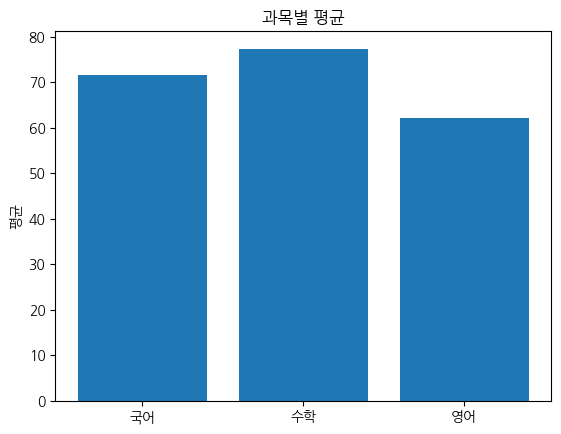

In [172]:
# 3
plt.title('과목별 평균')
plt.ylabel('평균')
plt.bar(m.index, out_df_mean) # bar 그래프는 x, y를 입력해야함.
# plt.bar(out_df.columns, m)
plt.show()

In [155]:
out_df.describe()

,국어,수학,영어
count,10.000000,10.000000,10.00000
mean,71.600000,77.300000,62.00000
std,20.646226,29.616249,29.06315
min,32.000000,24.000000,21.00000
25%,59.750000,54.250000,35.25000
50%,75.000000,83.500000,68.00000
75%,86.250000,99.250000,87.00000
max,100.000000,120.000000,100.00000


In [158]:
# 과목별 최대 최소값
print(out_df.max())

국어    100
수학    120
영어    100
dtype: int64

In [160]:
print(out_df.min())

국어    32
수학    24
영어    21
dtype: int64


In [165]:
# q1, q2, q3 
# 25% 50% 75%
# IQR = 50%에 해당하는 데이터


q1 = out_df.quantile(0.25)
print(q1)

q2 = out_df.quantile(0.5)
print(q2)

q3 = out_df.quantile(0.75)
print(q3)

iqr = q3 - q1 
# [-(1.5*IQR)] < 데이터 범위 < +(1.5* IQR)] 일반적인 데이터 허용 범위: 이 범위를 벗어나면 이상치(outlier)
print(iqr)

국어    59.75
수학    54.25
영어    35.25
Name: 0.25, dtype: float64
국어    75.0
수학    83.5
영어    68.0
Name: 0.5, dtype: float64
국어    86.25
수학    99.25
영어    87.00
Name: 0.75, dtype: float64
국어    26.50
수학    45.00
영어    51.75
dtype: float64


In [ ]:
limit = iqr * 1.5

# -limit < 데이터 < + limit
# for 조건
'''
if 값 > + Limit or 값 < -limit:
    return outlier
return data
'''

def outlier(df):
    korean = df['국어']
    if korean > limit or korean < -(limit):
        return True
    return False

outlier(out_df)

## 이상치 확인하기
- 이상치(outlier) : 사분위에서 특정 범위(+IQR*1.5)를 초과하는 경우

- 최소값, 중위값(median), 최대값
- 백분위수
- 사분위수 
    - interquartile range(IQR) (25%~75% : 50%)
    - Q1
    - Q2
    - Q3

In [12]:
import matplotlib.pyplot as plt


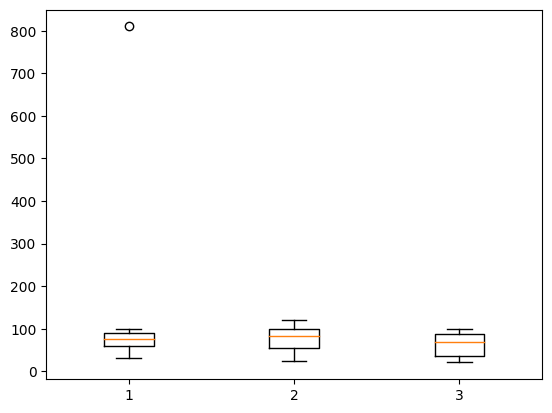

In [13]:
#이상치 확인 -> boxplot # 원하는 범주에 들지않는 값 찾기

plt.boxplot(out_df)
plt.show()

In [14]:
out_df['국어'] = out_df['국어'].replace(810, 81)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


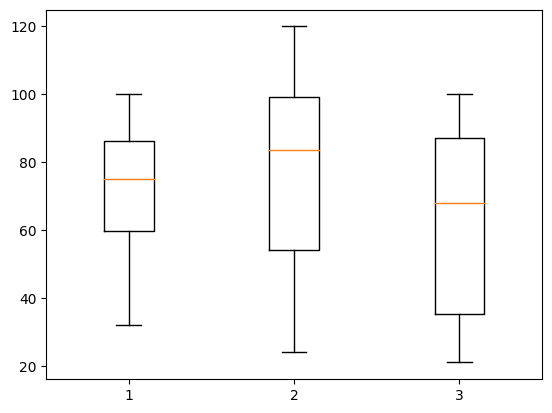

In [15]:
plt.boxplot(out_df)
plt.show()

# 날씨 데이터

## 1. 데이터 불러오기

In [16]:
weather_df = pd.read_csv('weather.csv', encoding='cp949')

In [17]:
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [18]:
weather_df.tail()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3
364,2010.12.31,-4.4,-1.0,15.0,19.2,6.3,284.1


## 2. 데이터 정보 확인

In [19]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [20]:
weather_df = weather_df.set_index('일시')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3


In [21]:
# pd.to_datetime
weather_df.index = pd.to_datetime(weather_df.index, format='%Y-%m-%d')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [22]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           359 non-null    float64
 1   최고기온(°C)           359 non-null    float64
 2   일강수량(mm)           359 non-null    float64
 3   최대 순간 풍속(m/s)      359 non-null    float64
 4   평균 풍속(m/s)         357 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [23]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [24]:
# 결측치 컬럼별 갯수 확인
# isnull/isna

weather_df.isna().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [25]:
# boolear -> Boolean indexing
# 최저기온의 어느 날짜가 비어있는지
weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최저기온(°C), dtype: float64

In [26]:
weather_df['최고기온(°C)'][weather_df['최고기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최고기온(°C), dtype: float64

In [27]:
weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 일강수량(mm), dtype: float64

In [28]:
weather_df['최대 순간 풍속(m/s)'][weather_df['최대 순간 풍속(m/s)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [29]:
weather_df['평균 풍속(m/s)'][weather_df['평균 풍속(m/s)'].isna()]

일시
2010-12-07   NaN
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
2010-12-14   NaN
Name: 평균 풍속(m/s), dtype: float64

In [30]:
weather_df['최대 순간 풍속 풍향(hhmi)'][weather_df['최대 순간 풍속 풍향(hhmi)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [31]:
'''
나머지 : 12월 8일 ~13일
평균 풍속 : 12월

SyntaxError: ignored

## 결측값 위치 확인 - 날짜


In [32]:
# 날짜 -> 12월 -> 결측
weather_df.loc['2010-12-07':'2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


## 결측치 처리하기

In [33]:
# 시간 흐름에 따른 데이터 -> 시계열
# 비어있는 값 앞뒤로 데이터 경향을 파악
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


### 일 강수량의 결측치를 0으로 채워주기 (fillna)


In [34]:
weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)
weather_df['일강수량(mm)'].isna().sum() 

0

In [35]:
# 기온데이터의 경우에는 4분위 데이터를 이용해서 사용

weather_df['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-09,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-10,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-11,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-12,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-13,NaN,NaN,0.0,NaN,NaN,NaN


In [36]:
# 최저기온, 최고기온의 결측값을 사분위값 50% 값으로 채우기
weather_df['최저기온(°C)'] = weather_df['최저기온(°C)'].fillna(0.4)
weather_df['최저기온(°C)']

일시
2010-01-01   -1.7
2010-01-02   -0.4
2010-01-03   -0.1
2010-01-04    1.0
2010-01-05   -2.1
             ... 
2010-12-27   -0.1
2010-12-28    1.0
2010-12-29   -0.5
2010-12-30   -4.4
2010-12-31   -4.4
Name: 최저기온(°C), Length: 365, dtype: float64

In [37]:
weather_df['최고기온(°C)'] = weather_df['최고기온(°C)'].fillna(2.9)
weather_df['최고기온(°C)']

일시
2010-01-01     5.0
2010-01-02    13.2
2010-01-03     7.5
2010-01-04    11.5
2010-01-05     1.7
              ... 
2010-12-27     6.7
2010-12-28     8.8
2010-12-29     5.9
2010-12-30     5.1
2010-12-31    -1.0
Name: 최고기온(°C), Length: 365, dtype: float64

In [38]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN


In [39]:
weather_df.loc['2010-12-06':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,10.000000,10.000000,10.0,4.000000,2.000000,4.000000
mean,0.070000,3.740000,0.0,24.100000,8.050000,243.200000
std,1.187013,3.309985,0.0,2.544275,0.777817,153.583658
min,-2.900000,2.000000,0.0,20.600000,7.500000,14.100000
25%,0.400000,2.900000,0.0,23.525000,7.775000,229.125000
50%,0.400000,2.900000,0.0,24.550000,8.050000,309.250000
75%,0.400000,2.900000,0.0,25.125000,8.325000,323.325000
max,1.600000,13.100000,0.0,26.700000,8.600000,340.200000


In [40]:
# 최대 순간 풍속을 평균값(mean)으로 채우기
weather_df['최대 순간 풍속(m/s)'] = weather_df['최대 순간 풍속(m/s)'].fillna(24.1)
weather_df['최대 순간 풍속(m/s)']

일시
2010-01-01    13.3
2010-01-02    17.0
2010-01-03    14.5
2010-01-04    22.4
2010-01-05    19.1
              ... 
2010-12-27    20.3
2010-12-28    15.5
2010-12-29    19.1
2010-12-30    18.8
2010-12-31    19.2
Name: 최대 순간 풍속(m/s), Length: 365, dtype: float64

In [41]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-09,0.4,2.9,0.0,24.1,NaN,NaN


In [42]:
weather_df['최대 순간 풍속(m/s)'].isna().sum()

0

In [43]:
# 평균풍속의 12월 4일부터 18일까지결측치 평균값으로 채우기
# 이 날짜별 데이터를 확인 -> 평균값 구하기 ->채워주기

In [44]:
weather_df.loc['2010-12-04':'2010-12-18'].describe()



,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,15.000000,15.000000,15.000000,15.000000,7.000000,9.000000
mean,-0.100000,5.333333,0.333333,19.700000,4.642857,223.388889
std,1.520338,4.349494,1.290994,6.676933,2.359984,121.731020
min,-3.200000,1.300000,0.000000,8.300000,2.900000,14.100000
25%,-0.650000,2.900000,0.000000,13.000000,3.250000,165.800000
50%,0.400000,2.900000,0.000000,24.100000,3.400000,284.100000
75%,0.400000,8.100000,0.000000,24.100000,5.550000,300.800000
max,2.800000,13.800000,5.000000,26.700000,8.600000,340.200000


In [45]:
weather_df['평균 풍속(m/s)'] = weather_df['평균 풍속(m/s)'].fillna(4.642857)
weather_df['평균 풍속(m/s)']

일시
2010-01-01    3.4
2010-01-02    5.1
2010-01-03    5.4
2010-01-04    5.2
2010-01-05    7.1
             ... 
2010-12-27    3.8
2010-12-28    5.2
2010-12-29    4.4
2010-12-30    5.8
2010-12-31    6.3
Name: 평균 풍속(m/s), Length: 365, dtype: float64

In [46]:
# 7일~17일까지 

weather_df.loc['2010-12-07':'2010-12-17'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000
mean,-0.481818,2.972727,0.454545,22.000000,4.694805,305.380000
std,1.389114,1.475189,1.507557,4.775353,1.037585,23.931506
min,-3.200000,1.300000,0.000000,11.800000,3.400000,284.100000
25%,-1.000000,2.450000,0.000000,22.350000,4.642857,284.100000
50%,0.400000,2.900000,0.000000,24.100000,4.642857,300.800000
75%,0.400000,2.900000,0.000000,24.100000,4.642857,317.700000
max,0.400000,7.100000,5.000000,26.700000,7.500000,340.200000


In [48]:
weather_df['최대 순간 풍속 풍향(hhmi)'] = weather_df['최대 순간 풍속 풍향(hhmi)'].fillna(305.38)
weather_df['최대 순간 풍속 풍향(hhmi)'].isna().sum()

0

In [49]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


## 데이터 시각화


In [50]:
# 한글 출력을 위한 추가 라이브러리

!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.3 MB/s eta 0:00:00


In [51]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [52]:
# plt.plt(변수, 컬럼)
x = weather_df.index # 시간순서
y1 = weather_df['최저기온(°C)']

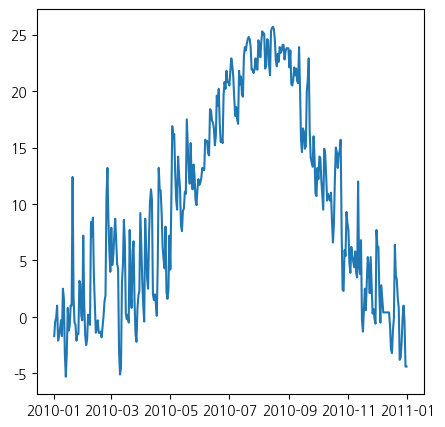

In [56]:
# 하나의 셀 안에 어떻게 출력할 것인지
# 크기가 10, 10
plt.figure(figsize=(5,5)) #그래프 사이즈
plt.plot(x, y1) #그래프 그리기
plt.show() # 그래프 출력

In [57]:
# 그래프 변수
x = weather_df.index # 시간순서

y1 = weather_df['최저기온(°C)']
y2 = weather_df['최고기온(°C)']
y3 = weather_df['일강수량(mm)']
y4 = weather_df['최대 순간 풍속(m/s)']
y5 = weather_df['평균 풍속(m/s)']
y6 = weather_df['최대 순간 풍속 풍향(hhmi)']

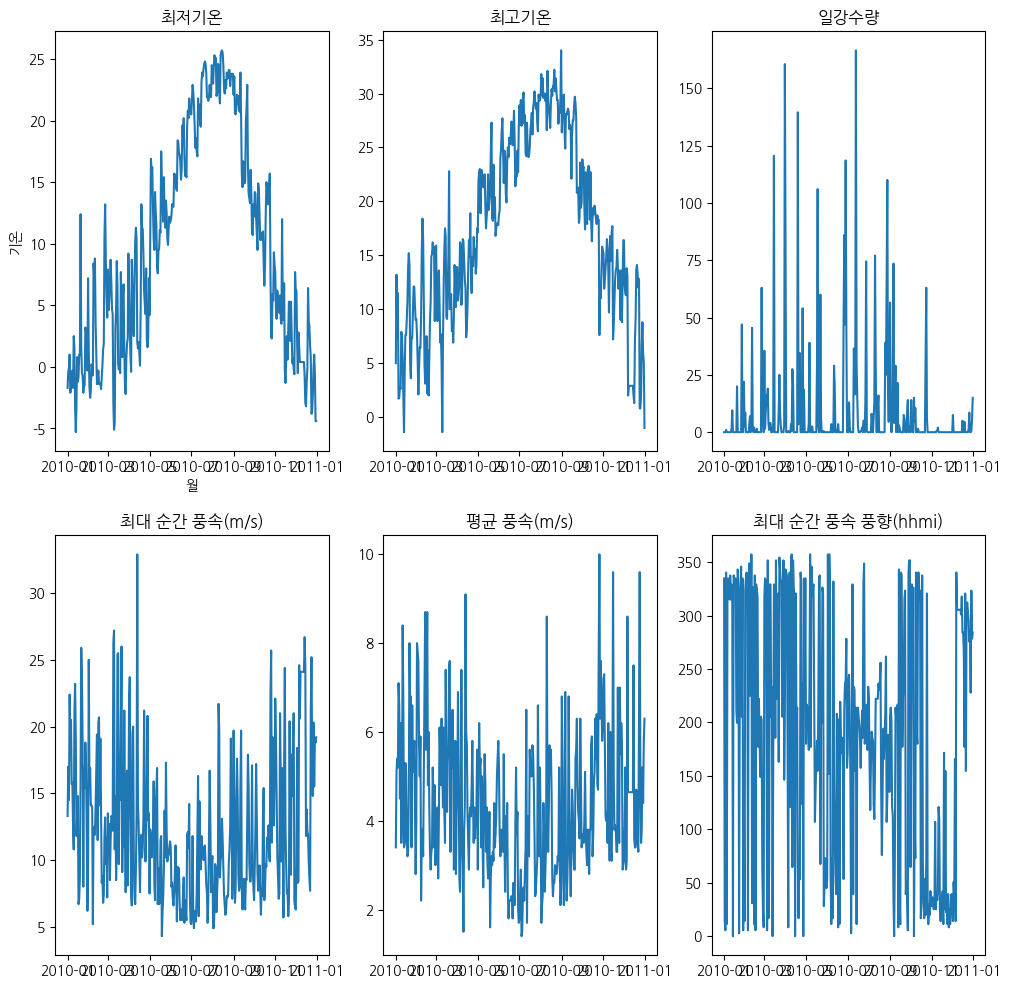

In [68]:
plt.figure(figsize=(12,12)) #그래프 사이즈

# subplots
# plt.subplot(행, 열, 인덱스)
plt.subplot(2, 3, 1)
plt.title('최저기온')
plt.xlabel('월')
plt.ylabel('기온')
plt.plot(x, y1) #그래프 그리기

plt.subplot(2, 3, 2)
plt.title('최고기온')
plt.plot(x, y2)

plt.subplot(2, 3, 3)
plt.title('일강수량')
plt.plot(x, y3)

plt.subplot(2, 3, 4)
plt.title('최대 순간 풍속(m/s)')
plt.plot(x, y4) #그래프 그리기

plt.subplot(2, 3, 5)
plt.title('평균 풍속(m/s)')
plt.plot(x, y5)

plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향(hhmi)')
plt.plot(x, y6)



plt.show() # 그래프 출력

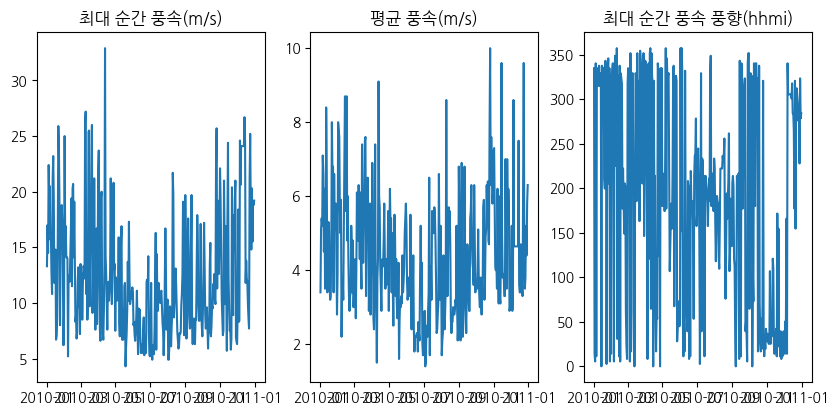

In [65]:
plt.figure(figsize=(10,10)) #그래프 사이즈

# subplots
# plt.subplot(행, 열, 인덱스)
plt.subplot(2, 3, 1)
plt.title('최대 순간 풍속(m/s)')
plt.plot(x, y4) #그래프 그리기

plt.subplot(2, 3, 2)
plt.title('평균 풍속(m/s)')
plt.plot(x, y5)

plt.subplot(2, 3, 3)
plt.title('최대 순간 풍속 풍향(hhmi)')
plt.plot(x, y6)


plt.show() # 그래프 출력



In [69]:
# groupby: 기준 데이터 -> (처리할) 수치 데이터
# 월 별/ 기온, 풍속 ...

weather_df.index # datetimeindex


DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='일시', length=365, freq=None)

In [72]:
weather_date = pd.Series(weather_df.index)

In [73]:
weather_df['월'] = weather_date.dt.month.values

In [74]:
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,12
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,12
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,12


In [95]:
# groupby # 기준이 될 데이터 소괄호 안에, 특정 컬럼 선택시 인덱싱해서 뒤에

weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()

월
1      0.190323
2      2.132143
3      3.048387
4      5.450000
5     11.906452
6     16.816667
7     21.722581
8     23.812903
9     17.960000
10    10.709677
11     3.683333
12     0.348387
Name: 최저기온(°C), dtype: float64

In [94]:
# 최고기온
weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()


월
1      7.583871
2      9.185714
3     11.029032
4     13.676667
5     20.396774
6     24.230000
7     27.570968
8     29.803226
9     25.636667
10    18.561290
11    13.350000
12     6.938710
Name: 최고기온(°C), dtype: float64

In [93]:
# 일강수량 
weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()

월
1      3.354839
2      5.446429
3     14.145161
4     14.016667
5      8.048387
6     13.533333
7     13.274194
8     14.548387
9      9.516667
10     4.709677
11     0.100000
12     1.548387
Name: 일강수량(mm), dtype: float64

In [92]:
# 최대 순간 풍속, 평균풍속, 최대순간 풍속 풍향

weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()


월
1     15.358065
2     13.410714
3     14.851613
4     13.830000
5     10.622581
6      8.056667
7      9.293548
8      9.806452
9     11.136667
10    11.748387
11    12.966667
12    17.416129
Name: 최대 순간 풍속(m/s), dtype: float64

In [90]:
weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()

월
1     5.064516
2     5.146429
3     4.938710
4     4.453333
5     3.970968
6     3.140000
7     3.648387
8     3.545161
9     4.186667
10    4.970968
11    4.833333
12    4.752995
Name: 평균 풍속(m/s), dtype: float64

In [91]:
weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()


월
1     236.129032
2     216.917857
3     246.287097
4     219.993333
5     203.651613
6     160.003333
7     192.303226
8     179.329032
9     177.336667
10    145.577419
11     45.343333
12    241.154194
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [98]:
# 그룹바이 월별데이터 -> 1월 데이터들 -> 그래프
month_low_temp = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()

In [99]:
month_high_temp = weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()

In [100]:
month_daily_vol = weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()

In [101]:
month_wind_speed = weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()

In [102]:
month_wind_mean = weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()

In [103]:
month_wind_dic = weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

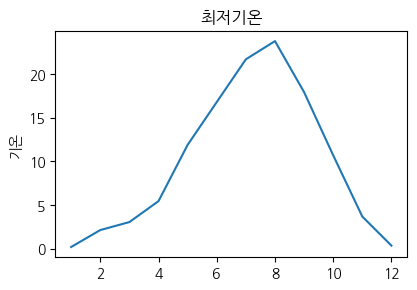

In [104]:
# 그룹바이 월별데이터 -> 1월 데이터들 -> 그래프
plt.figure(figsize=(10, 10))

# 1
plt.subplot(3, 2, 1)
plt.title('최저기온')
plt.ylabel('기온')
plt.plot(month_low_temp) # 
plt.show() 

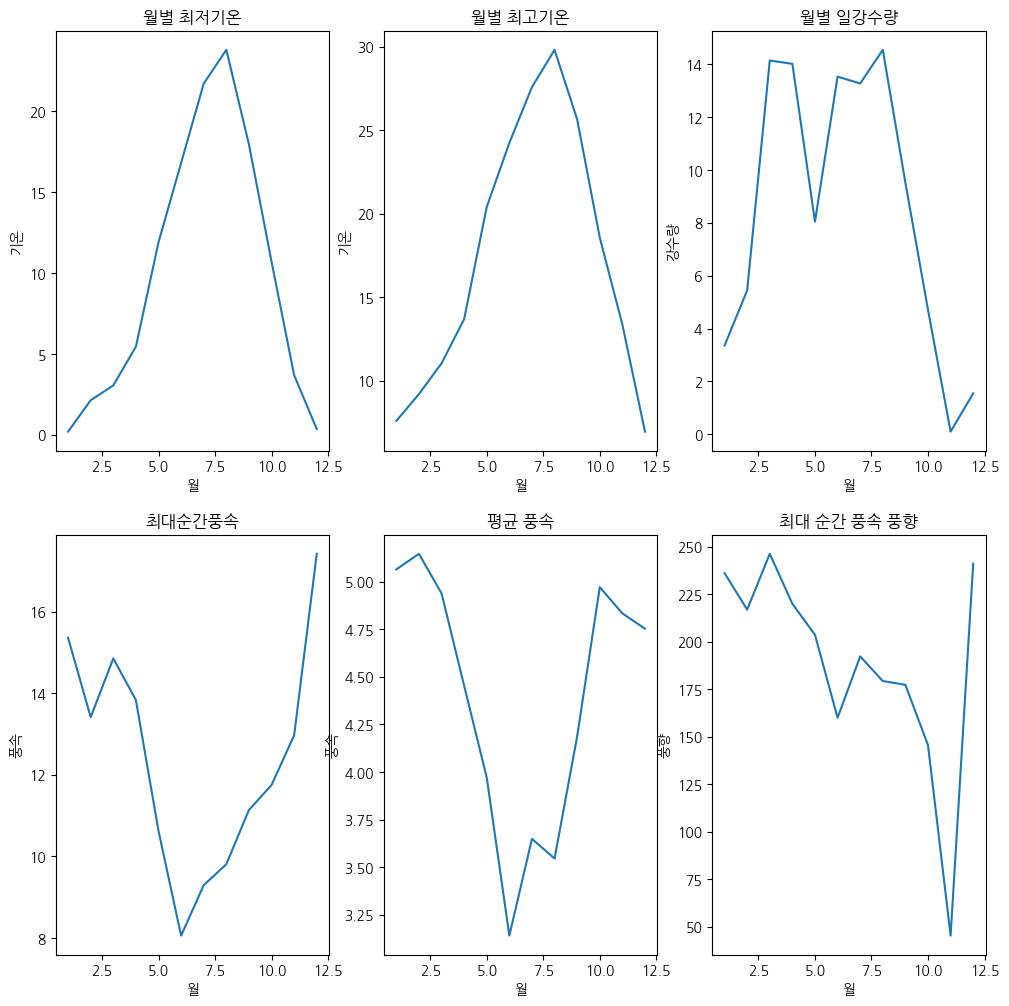

In [115]:
# 인덱스 -> 월 (데이터 뽑음) -> 이 데이터는 각각 1- 12월까지 숫자로 정리되어 있음
# -> 여기에서 1월 데이터만 뽑기 -> 31개의 데이터(0-31)

# 인덱스 1월 해당 (조건) -> 일별날짜: ok
plt.figure(figsize=(12, 12))

#1
plt.subplot(2, 3, 1)
plt.title('월별 최저기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_low_temp) 


# 2
plt.subplot(2, 3, 2)
plt.title('월별 최고기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_high_temp) 


# 3
plt.subplot(2, 3, 3)
plt.title('월별 일강수량')
plt.ylabel('강수량')
plt.xlabel('월')
plt.plot(x_month, month_daily_vol) 

# 4
plt.subplot(2, 3, 4)
plt.title('최대순간풍속')
plt.ylabel('풍속')
plt.xlabel('월')
plt.plot(x_month, month_wind_speed) 


# 5
plt.subplot(2, 3, 5)
plt.title('평균 풍속')
plt.ylabel('풍속')
plt.xlabel('월')
plt.plot(x_month, month_wind_mean) 


# 6
plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향')
plt.ylabel('풍향')
plt.xlabel('월')
plt.plot(x_month, month_wind_dic) 
plt.show() 

In [110]:
#x_month = weather_df['월']
#x_month.values
#
x_month = weather_df['월'].unique()
x_month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

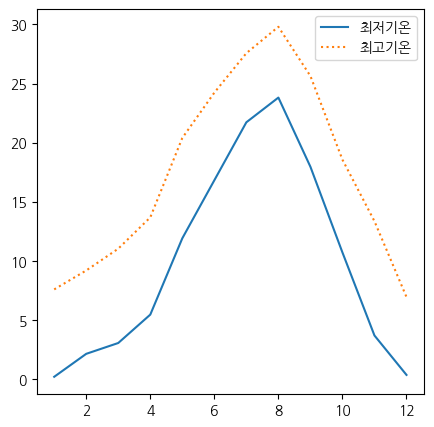

In [125]:
# 기온 그래프를 하나의 그래프로 표시
# 그래프 선 옵션
plt.figure(figsize=(5, 5))



plt.plot(x_month, month_low_temp, label='최저기온') 
plt.plot(x_month, month_high_temp, ':', label='최고기온')
plt.legend(loc='upper right')
# 색상 : b : blue/ r: red/ y : yellow/ w : white etc
# 선 : o : dot/--: dash line/-. : dash dot/ : - dot
# 범례 위치 : upper left, upper center, center (left, right), lower(left, right)

plt.show()

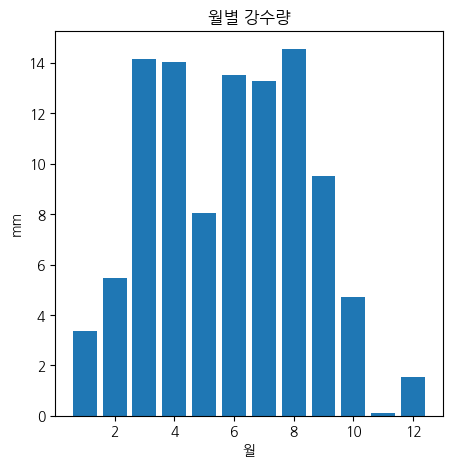

In [127]:
# 일 강수량 바 그래프로 나타내기 -> 데이터 타입에 따라 적절한 그래프 선택

plt.figure(figsize=(5, 5))
plt.title('월별 강수량')
plt.ylabel('mm')
plt.xlabel('월')
plt.bar(x_month, month_daily_vol)
plt.show()

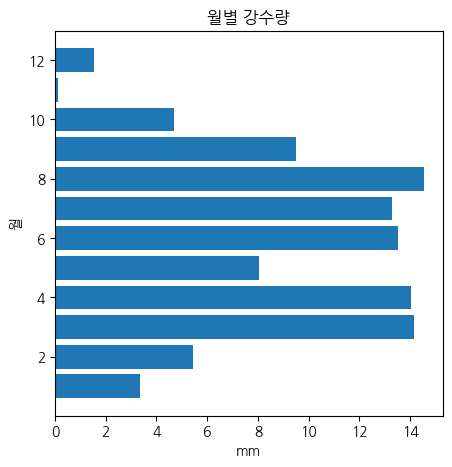

In [129]:
plt.figure(figsize=(5, 5))
plt.title('월별 강수량')
plt.ylabel('월')
plt.xlabel('mm')
plt.barh(x_month, month_daily_vol)
plt.show()

In [130]:
# 인덱스, -> 월 -> 1 -> 1월 데이터만 뽑아온다 -> 31개의 데이터 (0-31) 1일 -31일
# 1월 데이터 -> 31개

# 인덱스 1월 해당(조건) -> 일별 날자: ok

# groupby : 기준 -> 범위를 나눠서 수치를 분석
# 1월 데이터 -> groupby(x) : 비교가 아니고 조건

# 그냥 1월 데이터 뽑아오면 됨

In [132]:
month_1 = weather_df[weather_df['월']==1]

In [133]:
month_1.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1


In [134]:
month_1.tail()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-27,3.2,12.1,47.0,18.8,5.3,205.3,1
2010-01-28,2.9,12.1,0.5,17.2,5.8,334.7,1
2010-01-29,0.1,10.3,0.0,12.2,4.4,5.5,1
2010-01-30,-0.3,9.0,22.0,6.2,2.8,135.0,1
2010-01-31,7.2,9.1,2.5,9.0,3.9,14.1,1


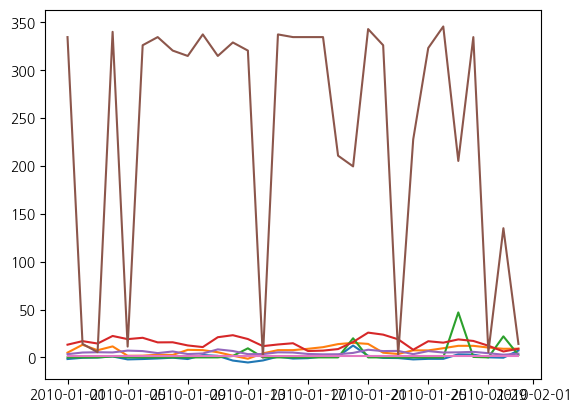

In [135]:
plt.plot(month_1)
plt.show()

## 더 간단한 방법은 없는지 항상 고민하기!
## ex) Titanic 데이터 - 데이터 
## 데이터 특성이 이러해서 이걸 사용, 어떤걸 생각했다.

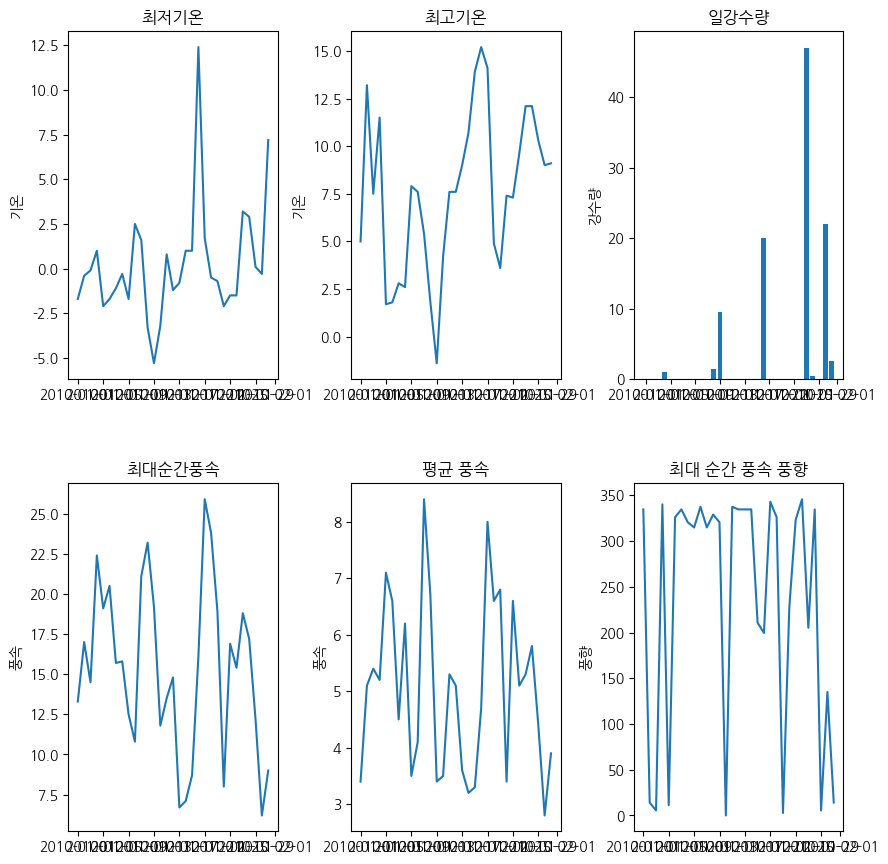

In [148]:
# 1월 데이터를 subplot을 이용해서 2X3으로 그리기 -> 강수량은 bar 그래프로


plt.figure(figsize=(10, 10))

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.3)

#1
plt.subplot(2, 3, 1)
plt.title('최저기온')
plt.ylabel('기온')
plt.plot(month_1['최저기온(°C)'])

#plt.plot(month_1['최고기온(°C)'])
#
# 2
plt.subplot(2, 3, 2)
plt.title('최고기온')
plt.ylabel('기온')
plt.plot(month_1['최고기온(°C)'])


# 3
plt.subplot(2, 3, 3)
plt.title('일강수량')
plt.ylabel('강수량')
plt.bar(month_1.index, month_1['일강수량(mm)']) # bar 그래프는 x, y를 입력해야함.

# 4
plt.subplot(2, 3, 4)
plt.title('최대순간풍속')
plt.ylabel('풍속')
plt.plot(month_1['최대 순간 풍속(m/s)'])

# 5
plt.subplot(2, 3, 5)
plt.title('평균 풍속')
plt.ylabel('풍속')
plt.plot(month_1['평균 풍속(m/s)'])


# 6
plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향')
plt.ylabel('풍향')
plt.plot(month_1['최대 순간 풍속 풍향(hhmi)'])

plt.show()

# 제주도 음식점 데이터


## 데이터 가져오기 (모듈 세팅)



한국 관광 데이터 랩(https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do)

In [173]:
food = pd.read_excel('jeju_food.xlsx')
food.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [174]:
food.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551
499,500,오후새우시,제주특별자치도,서귀포시,제주 서귀포시 천제연로 184-0,음식,한식,3542


## 데이터 정보 확인

In [175]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [176]:
food.describe()

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


In [178]:
# 결측치 확인
food.isna().sum()

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

## 데이터 전처리


In [179]:
# 광역시/도 컬럼 삭제

food = food.drop('광역시/도', axis=1)
food


,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


## 유일값 확인

In [180]:
food['중분류 카테고리'].unique()

array(['음식'], dtype=object)

In [181]:
food = food.drop('중분류 카테고리', axis=1)
food

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


## 유일값 갯수 세기 .value_counts(

In [183]:
food['소분류 카테고리'].unique()

array(['한식', '간이음식', '카페/찻집', '음식점기타', '전문음식', '외국식'], dtype=object)

In [182]:
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [185]:
food['시/군/구'].unique() 

array(['제주시', '서귀포시'], dtype=object)

In [184]:
food['시/군/구'].value_counts() 
# 인기 많은(검색이 많이 된) 식당은 제주시가 서귀포시보다 더 많다.
# 사실관계 정리 -> 보고서 내용

제주시     309
서귀포시    191
Name: 시/군/구, dtype: int64

In [186]:
# 인덱스 바꿔줄 때는 안에 있는 거 (내부 컬럼을 인덱스로)

food = food.set_index('순위')
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


In [191]:
# food -> 소분류 카테고리 = 한식

food[food['소분류 카테고리']=='한식']


,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
...,...,...,...,...,...
488,목포고을,서귀포시,제주 서귀포시 일주서로 968-5,한식,3602
493,삼일식당[한식],제주시,제주 제주시 한림상로 92-0,한식,3568
495,풍로,서귀포시,제주 서귀포시 신화역사로 423-0,한식,3564


In [192]:
# food -> 소분류 카테고리 = 카페/찻집 -> dataframe
# head, slicing, loc(어렵다). iloc(인덱스 번호)
food[food['소분류 카테고리']=='카페/찻집']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...
468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611


In [193]:
food[food['소분류 카테고리']=='한식'].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


In [194]:
food[food['소분류 카테고리']=='한식'][0:10]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


In [197]:
# .str.contains('keyword') 어떤 텍스트 안에 이 키워드가 있는지 없는지 -> boolean -> boolean indexing

# 제주도 내 스타벅스의 순위

cafe = food[food['소분류 카테고리']=='카페/찻집']



In [203]:
cafe[cafe['관광지명'].str.contains('스타벅스')].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [204]:
# 한식 -> 국수
korean = food[food['소분류 카테고리']=='한식']
korean

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
...,...,...,...,...,...
488,목포고을,서귀포시,제주 서귀포시 일주서로 968-5,한식,3602
493,삼일식당[한식],제주시,제주 제주시 한림상로 92-0,한식,3568
495,풍로,서귀포시,제주 서귀포시 신화역사로 423-0,한식,3564


In [206]:
korean[korean['관광지명'].str.contains('국수')].count() # 이름에 국수가 들어감

관광지명        27
시/군/구       27
도로명주소       27
소분류 카테고리    27
검색건수        27
dtype: int64

In [208]:
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


# pie graph

* plt.pie(비율, 레이블)

In [213]:
pie = food['소분류 카테고리'].value_counts()
pie.values # 비율로 바꾸기 

array([210, 152,  74,  49,  12,   3])

In [215]:
# list값에 대한 계산을 할 때는 리스트 컴프리헨션 이용 권장
# 순회가능한 계산이 필요할 때
pie_p = [pie.values[0]] # 리스트 컴프리헨션으로 한번에 바꿔주는 게 편하긴 함

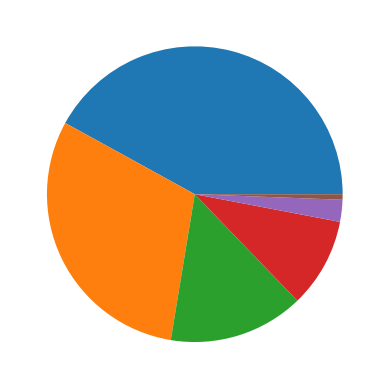

In [212]:
plt.pie(pie)
plt.show()

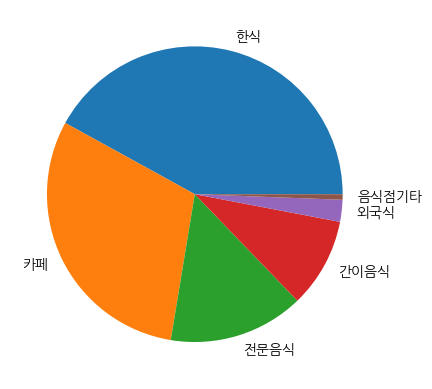

In [217]:
label = ['한식', '카페', '전문음식','간이음식', '외국식','음식점기타']
plt.pie(pie.values, labels = label) # pie.values 자리에 비율을 넣어주면됨
plt.show()